## SEABORN İLE GRAFİKLER

In [1]:
# Histogram ve Yoğunluk Grafikleri
# İlişki Grafiği
# Facet Histogramlar
# Kutu Grafikleri
# Bar Grafikler

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [3]:
iris = sns.load_dataset("iris")
bahsis = sns.load_dataset("tips")

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "veriginica"]


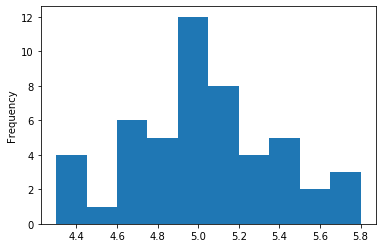

In [7]:
# setosa türüne ait çanak yaprak boyunun histogramını çizelim.

setosa.sepal_length.plot.hist()

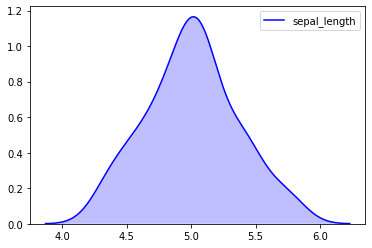

In [9]:
# setosa türüne ait çanak yaprak boyunun yoğunluk grafiğini çizdirelim:
sns.kdeplot(setosa.sepal_length, shade=True, color="b")

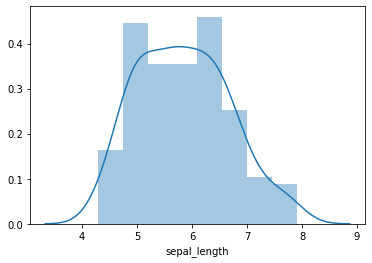

In [12]:
# çanak yaprak boyunun histogram ve yoğunluk grafiklerini aynı anda gösterelim:
sns.distplot(iris.sepal_length)


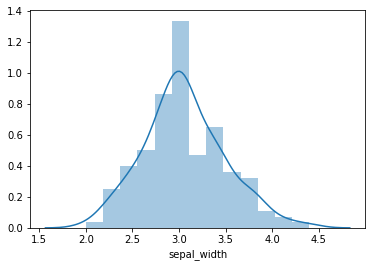

In [13]:
# çanak yaprak genişliğinin histogram ve yoğunluk grafiklerini aynı anda gösterelim:
sns.distplot(iris.sepal_width)

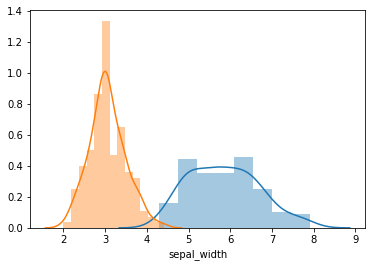

In [14]:
# çanak yaprak boy ve genişliğini aynı anda gösterelim:
sns.distplot(iris.sepal_length)
sns.distplot(iris.sepal_width)

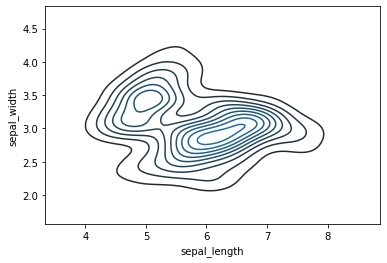

In [15]:
# İKİ BOYUTLU GRAFİK ÇİZİMİ

sns.kdeplot(iris.sepal_length, iris.sepal_width)


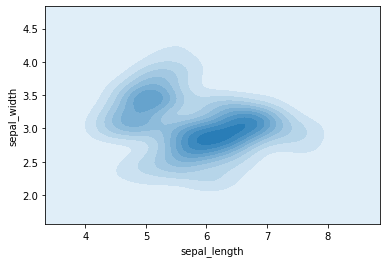

In [16]:
# gölgeli olarak çizelim
sns.kdeplot(iris.sepal_length, iris.sepal_width, shade=True)

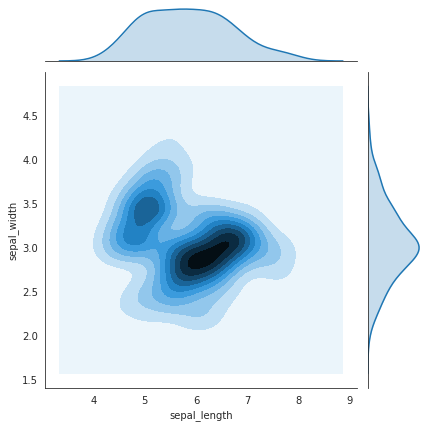

In [17]:
# Birleşik ve marjinal dağılımlı grafikleri gösterelim.(jointplot)

with sns.axes_style("white"):
    sns.jointplot("sepal_length","sepal_width", data = iris, kind = "kde")
    


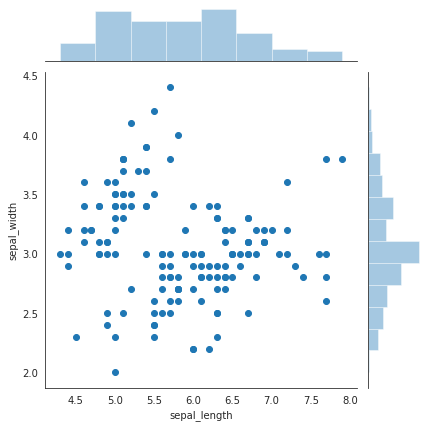

In [18]:
# saçılım garfiği
with sns.axes_style("white"):
    sns.jointplot("sepal_length","sepal_width", data = iris)
    

 ## İLİŞKİ GRAFİKLERİ

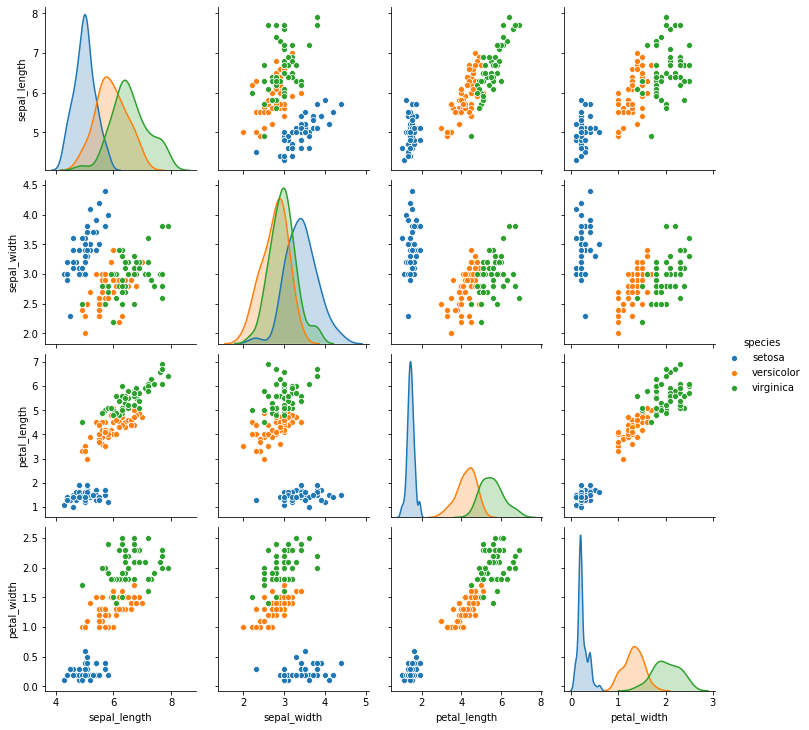

In [20]:
# Değişkenlerin ikili ilişkilerini görmek isteyelim:(pairplot)
sns.pairplot(iris, hue="species")

# Facet Histogramlar

In [22]:
bahsis = sns.load_dataset("tips")
bahsis.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
# veri setine bahsi_yuzde değişkenini ekleyelim.
bahsis["bahsis_yuzde"] = bahsis["tip"] * 100 / bahsis["total_bill"]

In [24]:
bahsis.head()

,total_bill,tip,sex,smoker,day,time,size,bahsis_yuzde
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


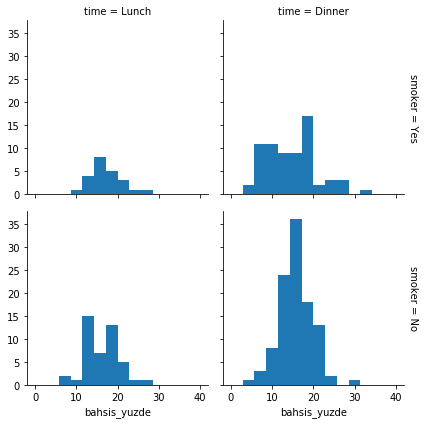

In [27]:
grid = sns.FacetGrid(bahsis, row = "smoker", col = "time", margin_titles = True)
grid.map(plt.hist, "bahsis_yuzde", bins = np.linspace(0,40,15))

# KUTU GRAFİKLERİ

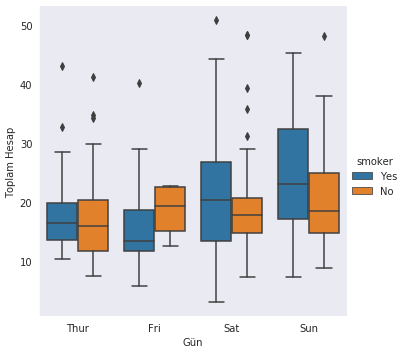

In [28]:
# sigara ve gün kategorik değişkenlerine göre toplam hesabın kutu grafiği 
with sns.axes_style(style = "dark"):
    g = sns.catplot("day", "total_bill", "smoker", data = bahsis, kind = "box")
    g.set_axis_labels("Gün","Toplam Hesap")
    
# kutu dışında gözüken değerler aykırı değerlerdir.

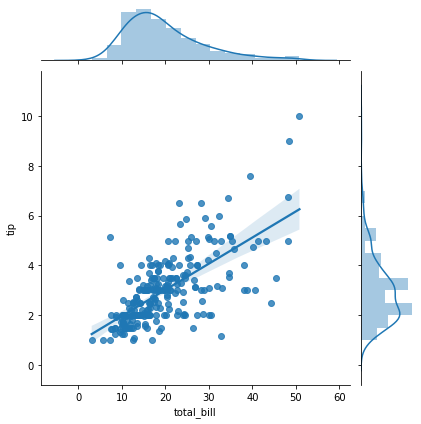

In [35]:
# birleşik histogram - yoğunluk ve regresyon doğrusunu aynı grafikte gösterelim.(jointplot metodu)

sns.jointplot("total_bill", "tip", data = bahsis, kind = "reg")

### BAR GRAFİĞİ

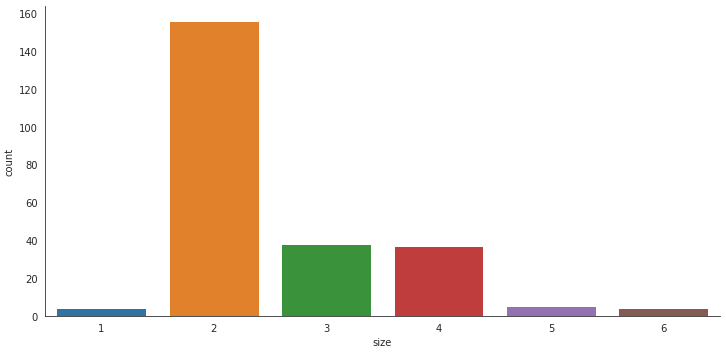

In [37]:
# size değişkeni için bar grafiğini çizelim:
with sns.axes_style("white"):
    g = sns.catplot("size", data = bahsis, aspect = 2, kind ="count")
    